In [82]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Important libraries
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor 
from sklearn.model_selection import train_test_split

# Loading data from the .csv file
data_raw = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BCW_dataset.csv', delimiter=',', header=0, index_col=None)
# Head method show first 5 rows of data
print(data_raw.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [84]:
# Drop unused columns
drop_columns = ['Unnamed: 32','id',	'diagnosis',	'radius_mean',	'texture_mean',	'perimeter_mean',	'area_mean',	'smoothness_mean',	'compactness_mean',	'concavity_mean',	'concave points_mean', 'fractal_dimension_mean', 'texture_se', 'perimeter_se',	'area_se',	'smoothness_se',	'symmetry_se',	'fractal_dimension_se', 'radius_worst',	'perimeter_worst',	'area_worst',	'compactness_worst',	'concavity_worst',	'fractal_dimension_worst']
# Convert strings -> integers
d = {'M': 0, 'B': 1}
# Define features and labels
y = data_raw['diagnosis'].map(d)
X = data_raw.drop(drop_columns, axis=1)
print('X.shape: ',X.shape)
print('y.shape: ',y.shape)
# testing the data values
print(y.values )
y_tmp=y.values
print(y_tmp[0:22])

X.shape:  (569, 9)
y.shape:  (569,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt


# Split dataset into training (75%) and test (25%) set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
# Normalization of the data
X_train_n = (X_train-X_train.mean())/(X_train.max()-X_train.min())
X_test_n = (X_test-X_train.mean())/(X_test.max()-X_test.min())
print(X_train_n.shape)
print(y_train.shape)
print(y[0:3])
#print(X_train_n)

(426, 9)
(426,)
0    0
1    0
2    0
Name: diagnosis, dtype: int64


In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [87]:
# One hot encoding
encode_array = OneHotEncoder()
Y = encode_array.fit_transform(y[:, None]).toarray()
print('y[0:5] = ',y[0:5])
print(' ')
print('First five one hot encoded output: ')
print(Y[0:5])

y[0:5] =  0    0
1    0
2    0
3    0
4    0
Name: diagnosis, dtype: int64
 
First five one hot encoded output: 
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [88]:
num_features = X.shape[1]
num_classes = Y.shape[1]
print('num_features = ',num_features)
print('num_classes = ',num_classes)

num_features =  9
num_classes =  2


In [10]:
from keras.models import Sequential
from keras.layers import Dense

In [89]:
# define the model structure
# Dense : a regular fully connected layer

# The following is a simple two-hidden layer ANN; 
# 30 inputs, 10/8 hidden nodes; 2 outputs with softmax
# Define the number of hidden nodes
num_hidden_nodes1 = 10
num_hidden_nodes2 = 8

def model_1():
    # create model
    model = Sequential()
    model.add(Dense(num_hidden_nodes1, input_dim=num_features, activation='relu'))
    model.add(Dense(num_hidden_nodes2, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # Choice of optimizer: adam (adaptive moment estimation), AdaGrad (adaptive learning rate), 
    # sgd (Stochastic gradient descent), RMSprop (similar to AdaGrad), Adadelta (adaptive delta) ...
    return model

# build the model
model = model_1()


In [90]:
# Training of the ANN
history = model.fit(X_train_n, y_train, batch_size=5, epochs=60,verbose=2, validation_data=(X_test_n, y_test))

# Testing of the trained ANN with X_test
score = model.evaluate(X_test_n, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/60
86/86 - 0s - loss: 0.6421 - accuracy: 0.7277 - val_loss: 0.5917 - val_accuracy: 0.7902 - 472ms/epoch - 5ms/step
Epoch 2/60
86/86 - 0s - loss: 0.4959 - accuracy: 0.8592 - val_loss: 0.4392 - val_accuracy: 0.8671 - 111ms/epoch - 1ms/step
Epoch 3/60
86/86 - 0s - loss: 0.3601 - accuracy: 0.8967 - val_loss: 0.3243 - val_accuracy: 0.9021 - 110ms/epoch - 1ms/step
Epoch 4/60
86/86 - 0s - loss: 0.2697 - accuracy: 0.9178 - val_loss: 0.2531 - val_accuracy: 0.9091 - 120ms/epoch - 1ms/step
Epoch 5/60
86/86 - 0s - loss: 0.2142 - accuracy: 0.9319 - val_loss: 0.2146 - val_accuracy: 0.9371 - 153ms/epoch - 2ms/step
Epoch 6/60
86/86 - 0s - loss: 0.1832 - accuracy: 0.9390 - val_loss: 0.1914 - val_accuracy: 0.9371 - 109ms/epoch - 1ms/step
Epoch 7/60
86/86 - 0s - loss: 0.1628 - accuracy: 0.9437 - val_loss: 0.1762 - val_accuracy: 0.9371 - 113ms/epoch - 1ms/step
Epoch 8/60
86/86 - 0s - loss: 0.1491 - accuracy: 0.9460 - val_loss: 0.1684 - val_accuracy: 0.9441 - 108ms/epoch - 1ms/step
Epoch 9/60
86/86

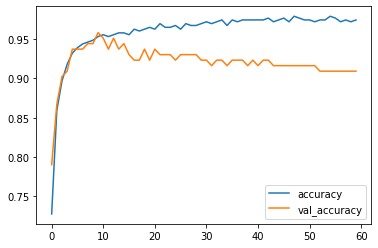

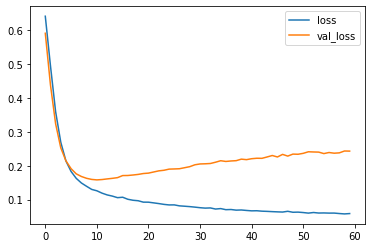

In [91]:
# To show the performance of the ANN during training
# The information has already been saved in "history"

metrics = history.history
plt.plot(history.epoch, metrics['accuracy'], metrics['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

In [92]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

In [93]:
y_prediction=model.predict(X_test_n)
print('y_prediction.shape = ',y_prediction.shape)
y_pred=np.argmax(y_prediction,axis=1)

5/5 [==============================] - 0s 2ms/step
y_prediction.shape =  (143, 2)


In [94]:
confusion_matrix(y_test, y_pred, labels=None, sample_weight=None)

array([[47,  6],
       [ 7, 83]])

In [95]:
print(precision_score(y_test, y_pred, average=None))

[0.87037037 0.93258427]


In [96]:
print(recall_score(y_test, y_pred, average=None))

[0.88679245 0.92222222]


In [97]:
print(f1_score(y_test, y_pred, average=None))

[0.87850467 0.9273743 ]
